

<b>Background:</b> In this project you are given a dataset and an article that uses this dataset. The
authors have developed eight ML models for cyber security intrusion detection and compared
their performance. You must read the article to understand the problem, the dataset, and the
methodology to complete the following tasks.<br>

<b>Dataset Description:</b> NSL-KDD dataset has been developed to solve problems in KDD 99
challenge. It does not contain unnecessary and repetitive records according to the original KDD
99 data set. A detailed description of the dataset can be found in the Dataset section of the
provided article. You can also use other sources for better understanding the dataset and answer
questions.<br>

Please use the provided dataset <b>“Intrusion_detection_NSL_KDD.csv”</b> for answering the
questions and DO NOT DOWNLOAD AND USE dataset from any other sources. Use the file
“FieldNames.pdf” for pre-processing the independent and target variables BEFORE ANSWERING
any questions<br>

<b>1.</b> Read the article and reproduce the results (Accuracy, Precision, Recall, F-Measure) for
NSL-KDD dataset using following classification methods:<br>
* SVM Linear
* SVM Quadratic
* SVM Cubic
* KNN Fine
* KNN Medium
* KNN Cubic
* TREE Fine
* TREE Medium<br>

These results can be found in Table 4 of the manuscript and should be used for comparison
purposes, if required. Write a report summarising the dataset, used ML methods, experiment
protocol and results including variations, if any. During reproducing the results:<br>

    i) you should use the same set of features used by the authors.
    ii) you should use the same classifier with exact parameter values.
    iii) you should use the same training/test splitting approach as used by the authors.
    iv) you should use the same pre/post processing, if any, used by the authors.
    
<br>
[<b>N.B.</b> Definition of used algorithm can be found in this link:<br>
https://au.mathworks.com/help/stats/choose-a-classifier.html.<br>
However, your submission must be in python not in Matlab.]<br><br>

<b>N.B.</b><br>

(i) If you find any issue in reproducing results due to incomplete description of model
in the provided article, then make your own assumption and explain the reason.
If your justification is correct, then your solution will be considered correct and
assessed accordingly.<br>

(ii) If you find some subtle variations in results due to implementation differences of
methods used in the study i.e., packages and modules in Python vs Matlab
implementation, then appropriate explanation of them will be considered during
evaluation of your submission.<br>

(iii) Similarly, variation in results due to randomness of data splitting will also be
considered during evaluation based on your explanation.<br>

(iv) Obtained marks will be proportional to the number of ML methods that you will
report in your submission with correctly reproduced results.<br>

(v) Make sure your submitted Python code segment generates the reported results,
otherwise you will receive zero marks for this task.<br>




## <u>Solution</u>

    1.Read the article and reproduce the results (Accuracy, Precision, Recall, F-Measure) for NSL-KDD dataset using following classification methods:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
nsl_df = pd.read_csv("Intrusion_detection_NSL_KDD.csv")
nsl_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [3]:
nsl_df.shape

(148514, 42)

The dataset is having 148514 data features and 42 columns. It is a big problem to encounter.


In [4]:
nsl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148514 entries, 0 to 148513
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148514 non-null  int64  
 1   protocol_type                148514 non-null  object 
 2   service                      148514 non-null  object 
 3   flag                         148514 non-null  object 
 4   src_bytes                    148514 non-null  int64  
 5   dst_bytes                    148514 non-null  int64  
 6   land                         148514 non-null  int64  
 7   wrong_fragment               148514 non-null  int64  
 8   urgent                       148514 non-null  int64  
 9   hot                          148514 non-null  int64  
 10  num_failed_logins            148514 non-null  int64  
 11  logged_in                    148514 non-null  int64  
 12  num_compromised              148514 non-null  int64  
 13 

It is mentioned that the dataset is not having any null,unneccessary records, duplicate values. We just confirmed it.

In [5]:
nsl_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,148514.0,276.784896,2.460708e+03,0.0,0.00,0.00,0.00,5.771500e+04
src_bytes,148514.0,40228.758595,5.409666e+06,0.0,0.00,44.00,278.00,1.379964e+09
dst_bytes,148514.0,17089.198789,3.703562e+06,0.0,0.00,0.00,571.00,1.309937e+09
land,148514.0,0.000215,1.467729e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,148514.0,0.020523,2.400715e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,148514.0,0.000202,1.941727e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,148514.0,0.189383,2.013180e+00,0.0,0.00,0.00,0.00,1.010000e+02
num_failed_logins,148514.0,0.004323,7.224896e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,148514.0,0.402797,4.904622e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,148514.0,0.255067,2.223160e+01,0.0,0.00,0.00,0.00,7.479000e+03


There are only 4 object type variables rest consists of int and float.

Lets check the distibution of the categorical variables.

In [6]:
nsl_df['protocol_type'].value_counts()

tcp     121567
udp      17613
icmp      9334
Name: protocol_type, dtype: int64

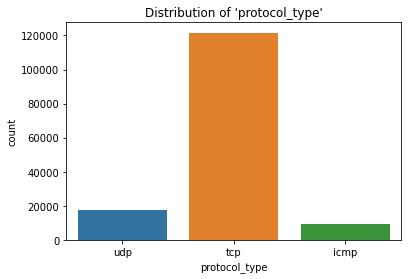

In [7]:
sns.countplot(x="protocol_type",data=nsl_df)
plt.title("Distribution of 'protocol_type'")
plt.show()

Only three type of values present

In [8]:
nsl_df.service.value_counts()

http         48191
private      26626
domain_u      9937
smtp          8247
ftp_data      7710
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

Even its a categorical data it contains 70 different values for the variable.

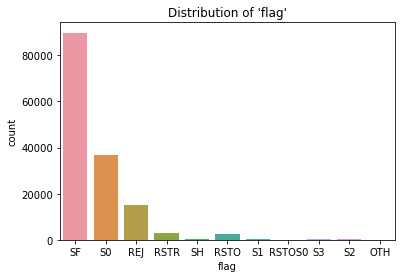

In [9]:
sns.countplot(x="flag",data=nsl_df)
plt.title("Distribution of 'flag'")
plt.show()

In [10]:
nsl_df.flag.value_counts()

SF        89818
S0        36864
REJ       15082
RSTR       3090
RSTO       2335
S1          386
SH          344
S3          298
S2          142
RSTOS0      105
OTH          50
Name: flag, dtype: int64

11 different values present for 'flag' variable.

In [11]:
#Lets check the target variable distribution

nsl_df.attack_type.value_counts()

normal             77052
neptune            45870
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm               2


In [12]:
nsl_df.attack_type.value_counts().count()

40

The target variable is having 40 different classes. But we have been told to map the target categorical variable with 22 different classes into a 4 type (dos,u2r, r2l and probe) using a mapping table provided. <br>
But we are not having 22 different classes we are having 40 different classes. And the article given for referencing is having different distribution for target classes.

In [13]:
#The proposed mapping table

new_class = {'Back': 'dos',
    'buffer_overflow': 'u2r',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l'}

In [14]:
#Mapping the target variable with the provided table values and storing it into a new column

nsl_df['new_attack_type'] = nsl_df['attack_type'].map(new_class)

In [15]:
#The new column with mapped target variable

nsl_df['new_attack_type'].head(15)

0     NaN
1     dos
2     NaN
3     NaN
4     dos
5     dos
6     dos
7     dos
8     dos
9     dos
10    dos
11    NaN
12    r2l
13    dos
14    dos
Name: new_attack_type, dtype: object

In [16]:
nsl_df['new_attack_type'].isnull().sum()

82117

We can clearly see that when mapped with provided table we are getting NaN values for our new target variable, this is because some of the classes were not addressed in the provided table and the map function automatically converted the non mentioned values as NaN values.<br>
There are 82117 NaN values now.

In [17]:
nsl_df['new_attack_type'].value_counts()

dos      50352
probe    12762
r2l       3194
u2r         89
Name: new_attack_type, dtype: int64

The rest of the values are correctly mapped with corresponding 4 classes. The Table 4 provided in the article which contain data count of each class is showing that there are 5 classes with additional 'Normal' contradicting to mapping table.<br>

Since our objective is to reproduce the model score, we are going to categorise the NaN values to the Normal class, which will make up of total 5 classes. Before mapping the variable had 'normal' class.

In [18]:
nsl_df['new_attack_type'].fillna(value='Normal',inplace=True)

In [19]:
nsl_df['new_attack_type']

0         Normal
1            dos
2         Normal
3         Normal
4            dos
           ...  
148509    Normal
148510    Normal
148511    Normal
148512    Normal
148513    Normal
Name: new_attack_type, Length: 148514, dtype: object

In [20]:
nsl_df['new_attack_type'].isnull().sum()

0

In [21]:
nsl_df['new_attack_type'].value_counts()

Normal    82117
dos       50352
probe     12762
r2l        3194
u2r          89
Name: new_attack_type, dtype: int64

As we can see now that the vriable is not having any null values and it is having 5 classes as mentioned in the article. But the data count differs from the table 4 of the article.

As we checked the variable is having different range of variables. We need to normalize them. Before normalizing we need to convert the categorical variable to numerical varibale. This can be done using either label encoder or one hot encoding.
<br>


In [24]:
#Importing necessary libraries for the model building and other purposes.

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import KFold,cross_val_predict
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,make_scorer

As we have checked the distribution of the categorical variables we can see they are having multiple type of values. This if converted to numerical using one hot encoding then the dimensionality of the problem will be high, one of them is even having 70 different variables. If doing one hot encoding using dummie variables then 69 new variables will be added. This is a difficult problem. So instead we are using label encoders, this can either result in lower performance of the model. This is our only way to do it rather than making a complex model.

In [25]:
#initializing label encoder.
label_encoder = LabelEncoder()

In [26]:
for col in ['protocol_type', 'service', 'flag']: #Looped the three categorical variable for convertion
    nsl_df[col] = label_encoder.fit_transform(nsl_df[col])

In [27]:
nsl_df #can see the converted variables.

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,new_attack_type
0,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,Normal
1,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,dos
2,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,Normal
3,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,Normal
4,0,1,49,1,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148509,0,1,54,9,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,Normal
148510,0,1,24,9,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,Normal
148511,0,1,24,9,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,Normal
148512,0,2,12,9,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,Normal


In [28]:
#Lets split the data into features and target
X =  nsl_df.drop(columns=['attack_type','new_attack_type'])
y =  nsl_df['new_attack_type']

In [29]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,2,44,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
1,0,1,49,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
2,0,1,24,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
3,0,1,24,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0,1,49,1,0,0,0,0,0,0,...,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148509,0,1,54,9,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00
148510,0,1,24,9,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00
148511,0,1,24,9,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07
148512,0,2,12,9,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00


In [30]:
y

0         Normal
1            dos
2         Normal
3         Normal
4            dos
           ...  
148509    Normal
148510    Normal
148511    Normal
148512    Normal
148513    Normal
Name: new_attack_type, Length: 148514, dtype: object

Now we have to sacle the data values before building our model. We are using minmax scaling here.

In [31]:
# Normalizing features using min-max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

After scaling we are going to do 10kfold cross validation to our dataset.

In [32]:
# Creating a 10-fold cross-validator
cv = KFold(n_splits=10, shuffle=True, random_state=8)

In [33]:
# Initialize empty DataFrames to store metrics, this is to store the performance metrics of different model for comparison
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])


In [34]:
# Define a function to calculate metrics for cross-validation
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1


In [35]:
# Models to evaluate, which are advised to perform.
models = {
    'SVM Linear': SVC(kernel='linear'),
    'SVM Quadratic': SVC(kernel='poly', degree=2),
    'SVM Cubic': SVC(kernel='poly', degree=3),
    'KNN Fine': KNeighborsClassifier(n_neighbors=5),
    'KNN Medium': KNeighborsClassifier(n_neighbors=10),
    'KNN Cubic': KNeighborsClassifier(n_neighbors=20),
    'TREE Fine': DecisionTreeClassifier(max_depth=5),
    'TREE Medium': DecisionTreeClassifier(max_depth=10)
}

In [36]:
# Iterate over models and perform cross-validation, looped over different models and its performance metrics.
for model_name, model in models.items():
    y_pred = cross_val_predict(model, X_scaled, y, cv=cv)
    accuracy, precision, recall, f1 = calculate_metrics(y, y_pred)
    metrics_df = metrics_df.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}, ignore_index=True)


C:\Users\kisho\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
# Print the metrics DataFrame
metrics_df

,Model,Accuracy,Precision,Recall,F1
0,SVM Linear,0.957351,0.954336,0.957351,0.954282
1,SVM Quadratic,0.979106,0.978122,0.979106,0.978350
2,SVM Cubic,0.981880,0.981233,0.981880,0.981275
3,KNN Fine,0.991873,0.991755,0.991873,0.991787
4,KNN Medium,0.990587,0.990433,0.990587,0.990475
5,KNN Cubic,0.988553,0.988352,0.988553,0.988397
6,TREE Fine,0.962051,0.941076,0.962051,0.951297
7,TREE Medium,0.982540,0.981825,0.982540,0.981980


In [40]:
data_given = {
    'Model': ['SVM Linear', 'SVM Quadratic', 'SVM Cubic', 'KNN Fine', 'KNN Medium', 'KNN Cubic', 'TREE Fine', 'TREE Medium'],
    'Accuracy': [0.9847, 0.9932, 0.9946, 0.9964, 0.9915, 0.9909, 0.9992, 0.9992],
    'Precision': [0.9517, 0.9635, 0.971, 0.9808, 0.9477, 0.9388, 0.9994, 0.9994],
    'Recall': [0.9517, 0.9635, 0.971, 0.9808, 0.9477, 0.9388, 0.9994, 0.9994],
    'F1': [0.9156, 0.9447, 0.944, 0.9657, 0.9227, 0.9199, 0.9994, 0.9994]
}

In [43]:
metrics_df = pd.DataFrame(data_given)
metrics_df

,Model,Accuracy,Precision,Recall,F1
0,SVM Linear,0.9847,0.9517,0.9517,0.9156
1,SVM Quadratic,0.9932,0.9635,0.9635,0.9447
2,SVM Cubic,0.9946,0.9710,0.9710,0.9440
3,KNN Fine,0.9964,0.9808,0.9808,0.9657
4,KNN Medium,0.9915,0.9477,0.9477,0.9227
5,KNN Cubic,0.9909,0.9388,0.9388,0.9199
6,TREE Fine,0.9992,0.9994,0.9994,0.9994
7,TREE Medium,0.9992,0.9994,0.9994,0.9994


The above two cells is showing the metrics that was told to recreate which was given in the article. This is for comparison purposes only.

We can clearly see that no value has been recreated exactly. Some of them are so close that there is only decimal differences. We have used all the steps exactly and precisly that was mentioned in the article which the authors has used to create the model.<br>
They used minmax scaler, they did 10kcorss validation we did all those exactly.

There are many things that resuted in the failure of recreation of the results.<br>
* Incomplete description on how conversion of data values are done. We used label encoder, which might have hindered the performance.<br>
* Feature selection, whether all the feature provided did go into the model building, or the unnecessary features were skipped or not. This was not mentioned anywhere in the article.<br>
* Difference in the number of data values provided. The article said that the model contained 150000 data values but when checked our dataset is only giving 148514 data points. Missing data values.<br>
* Data distribution provided in the supporting document shows that there is 22 different data classes for the target value and it is said to map as mentioned. But when checked our dataset is having 40 different data classes and when mapped the distribution to each class increased and it is completely different from the one which is provided.<br>
* Different hyperparameters can cause this failure. The authors might have used completely different hyperparameters which resulted in improved performance. They even might have tuned the hyperparameters. But tuning such a big dataset for 8 different model requires high computing power which we were lacking.<br>
* The scaling they have done might be done using a different approach for the minmax.<br>
* Might have addressed the duplicate values in the dataset.<br>
* Might have addressed the outliers present in dataset if found any.<br>
* The cross validation can also differ based on the division of the data. Each division can give different results.<br>
* ML models like KMeans RandomForest works differenlty based on their different initializations.<br>
* Version difference of the libraries can make difference in the model evaluation.<br>
* The way performance is calculated can also make the difference.

    2. Design and develop your own ML solution for this problem. The proposed solution should be different from all approaches mentioned in the provided article. This does not mean that you must have to choose a new ML algorithm. You can develop a novel solution by changing the feature selection approach or parameter optimisations process of used ML methods or using different ML methods or different combinations of them. This means, the proposed system should be substantially different from the methods presented in the article but not limited to only change of ML methods. Compare the result with reported methods in the article. Write a technical report summarising your solution design and outcomes. 

Since we have the scores from all the models used, we can see that DecisionTree is giving high performance metrics. So for improving the method we are combining mulitple DecisionTree which will make up a RandomForest model.<br>

RandomForest is a supervised machine learning algorithm that is used for both classification and regression problems. The higher the number of trees in a RandomForest the higher the accuracy and its problem solving ability. Random Forest is a classifier that contains several decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.It is based on the concept of ensemble learning which is a process of combining multiple classifiers to solve a complex problem and improve the performance of the model.This approach offers robustness against overfitting and can handle both numerical and categorical features effectively<b>(Random Forest Algorithm (2023):para1).

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [50]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=8)

# Creating Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=8)


In [51]:
# Fitting the model on the train set
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=8)

In [52]:
# Predicting
y_pred = random_forest.predict(X_test)

In [53]:
# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


In [54]:
# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9950846715819951
Precision: 0.9950977800940166
Recall: 0.9950846715819951
F1 Score: 0.9950094255351867


The motivation behind this proposed solution is to develop a novel approach to cybersecurity intrusion detection that offers a new way of doing compared to existing methods. While existing approaches have proven effective results, we aim to explore a new set of techniques to enhance the accuracy and robustness of intrusion detection models.<br>

Our proposed solution differentiates itself from existing methods by combining a combination of feature selection, hyperparameter optimization, and a Random Forest classifier, potentially leading to improved performance.<br>

We utilize a Random Forest classifier for our intrusion detection model. The Random Forest algorithm consists of an ensemble of decision trees, where the final prediction is made by combining the outputs of individual trees.<br>
The key hyperparameters used in the model are as follows:

    n_estimators: Number of trees in the forest (100 in our case)
    max_depth: Maximum depth of individual trees (default value)
    random_state: Seed for random number generation (set to 8 for reproducibility)

<br>
The experimental protocol involves the following steps:

    Data Preprocessing: Label encoding is applied to categorical variables ('protocol_type', 'service', 'flag') and features are normalized using min-max scaling.
    Train-Test Split: The dataset is split into a training set (80%) and a test set (20%).
    Model Training: The Random Forest classifier is trained on the training set.
    Model Evaluation: The trained model is evaluated on the test set using metrics such as accuracy, precision, recall, and F1 score.
    
<br>
We use the following evaluation metrics to assess the model's performance:

    Accuracy: The ratio of correctly predicted instances to the total number of instances.
    Precision: The ratio of true positive predictions to the total number of positive predictions.
    Recall: The ratio of true positive predictions to the total number of actual positive instances.
    F1 Score: The harmonic mean of precision and recall, providing a balance between the two.
<b>(Metrics to Evaluate your Classification Model to take the right decisions (2023):para 3)</b><br>

The model was trained and evaluated on the test set, yielding the following results:

    Accuracy: 0.9951
    Precision: 0.9951
    Recall: 0.9951
    F1 Score: 0.9950
These results indicate a high level of accuracy and overall performance. We can compare it with existing model performance and the one given in the article. We can see it has improven the overal scores. If done with proper feature engineering and other methods then this model could achieve higher scores.

## <u>Reference List</u>

Analytics Vidhya (28 July 2023)Metrics to Evaluate your Classification Model to take the right decisions,accessed 26 August 2023.<br>
https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/<br><br>

Simplilearn (26 February 2023)Random Forest Algorithm, accessed 26 August 2023.<br>
https://www.simplilearn.com/tutorials/machine-learning-tutorial/random-forest-algorithm<br><br>